# Travelling Salesman Problem Using Genetic Algorithm

In [2]:
import random
import numpy as np

In [3]:
cities = 5
distance_matrix = np.array([[0, 29, 20, 21, 15],
                            [29, 0, 15, 18, 12],
                            [20, 15, 0, 12, 25],
                            [21, 18, 12, 0, 19],
                            [15, 12, 25, 19, 0]])

In [4]:
#GA parameters
population_size = 50
num_generations = 1000
mutation_rate = 0.1
crossover_probability = 0.6

In [5]:
def initialize_population(size, n):
    population = [list(np.random.permutation(range(1, n + 1))) for _ in range(size)]
    return population

In [6]:
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route)):
        total_distance += distance_matrix[route[i] - 1][route[(i + 1) % len(route)] - 1]
    return 1 / total_distance

In [7]:
def select_parents(population, k=5):
    tournament = random.sample(population, k)
    return max(tournament, key=lambda x: calculate_total_distance(x))

In [8]:
def crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    offspring = [-1] * n

    offspring[start:end + 1] = parent1[start:end + 1]

    j = end + 1
    for i in range(end + 1, n + end + 1):
        if parent2[i % n] not in offspring:
            offspring[j % n] = parent2[i % n]
            j += 1

    return offspring

In [9]:
def mutate(individual):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]

In [10]:
population = initialize_population(population_size, cities)
for generation in range(num_generations):
    new_population = []

    for _ in range(population_size // 2):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        if random.random() < crossover_probability:
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
        else:
            offspring1, offspring2 = parent1[:], parent2[:]
        mutate(offspring1)
        mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    population = new_population

In [11]:
best_individual = max(population, key=lambda x: calculate_total_distance(x))
best_distance = 1 / calculate_total_distance(best_individual)

In [12]:
print("Best Route:", best_individual)
print("Total Distance (Inverse Cost):", best_distance)

Best Route: [2, 3, 4, 1, 5]
Total Distance (Inverse Cost): 75.0


## Comparison between Genetic Algorithm and Dynamic Programming

In [13]:
import itertools
def solve_tsp_dp(distance_matrix):
    n = len(distance_matrix)
    # Creating a DP table to store subproblem solutions
    dp = np.full((1 << n, n), float('inf'))
    parent = np.full((1 << n, n), -1)
    
    # Initializing DP table for the starting city (city 0)
    dp[1][0] = 0
    
    # Iterating over all subsets of cities
    for mask in range(1, 1 << n):
        for u in range(n):
            if (mask & (1 << u)) != 0:
                for v in range(n):
                    if (mask & (1 << v)) != 0 and u != v:
                        if dp[mask][u] > dp[mask ^ (1 << u)][v] + distance_matrix[v][u]:
                            dp[mask][u] = dp[mask ^ (1 << u)][v] + distance_matrix[v][u]
                            parent[mask][u] = v
    
    # Finding the optimal tour length
    optimal_tour_length = float('inf')
    for u in range(1, n):
        tour_length = dp[(1 << n) - 1][u] + distance_matrix[u][0]
        if tour_length < optimal_tour_length:
            optimal_tour_length = tour_length
            last_city = u
    
    # Reconstructing the best route
    route = []
    mask = (1 << n) - 1
    while last_city != -1:
        route.insert(0, last_city)
        new_last_city = parent[mask][last_city]
        mask ^= (1 << last_city)
        last_city = new_last_city
    
    return optimal_tour_length, np.add(route,1).tolist()

In [14]:
optimal_tour_length, optimal_route = solve_tsp_dp(distance_matrix)
print("Optimal TSP Tour Length (DP):", optimal_tour_length)
print("Best Route:", optimal_route)

Optimal TSP Tour Length (DP): 75.0
Best Route: [1, 5, 2, 3, 4]


In [15]:
# Comparison
gen = []
dyn = []

In [16]:
cities = 5
distance_matrix = np.array([[0, 29, 20, 21, 15],
                            [29, 0, 15, 18, 12],
                            [20, 15, 0, 12, 25],
                            [21, 18, 12, 0, 19],
                            [15, 12, 25, 19, 0]])

In [17]:
population = initialize_population(population_size, cities)
for generation in range(num_generations):
    new_population = []

    for _ in range(population_size // 2):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        if random.random() < crossover_probability:
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
        else:
            offspring1, offspring2 = parent1[:], parent2[:]
        mutate(offspring1)
        mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    population = new_population
best_individual = max(population, key=lambda x: calculate_total_distance(x))
best_distance = 1 / calculate_total_distance(best_individual)
print("Best Route GA:", best_individual)
print("Total Distance (Inverse Cost):", best_distance)
gen.append(best_distance)
optimal_tour_length, optimal_route = solve_tsp_dp(distance_matrix)
print("Best Route DP:", optimal_route)
print("Optimal TSP Tour Length (DP):", optimal_tour_length)
dyn.append(optimal_tour_length)

Best Route GA: [5, 1, 4, 3, 2]
Total Distance (Inverse Cost): 75.0
Best Route DP: [1, 5, 2, 3, 4]
Optimal TSP Tour Length (DP): 75.0


In [18]:
cities = 6
distance_matrix = np.array([[0, 29, 20, 21, 15, 25],
                            [29, 0, 15, 18, 12, 32],
                            [20, 15, 0, 12, 25, 40],
                            [21, 18, 12, 0, 19, 20],
                            [15, 12, 25, 19, 0, 34],
                            [25, 32, 40, 20, 34, 0]])

In [19]:
population = initialize_population(population_size, cities)
for generation in range(num_generations):
    new_population = []

    for _ in range(population_size // 2):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        if random.random() < crossover_probability:
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
        else:
            offspring1, offspring2 = parent1[:], parent2[:]
        mutate(offspring1)
        mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    population = new_population
best_individual = max(population, key=lambda x: calculate_total_distance(x))
best_distance = 1 / calculate_total_distance(best_individual)
print("Best Route GA:", best_individual)
print("Total Distance (Inverse Cost):", best_distance)
gen.append(best_distance)
optimal_tour_length, optimal_route = solve_tsp_dp(distance_matrix)
print("Best Route DP:", optimal_route)
print("Optimal TSP Tour Length (DP):", optimal_tour_length)
dyn.append(optimal_tour_length)

Best Route GA: [5, 1, 6, 4, 3, 2]
Total Distance (Inverse Cost): 98.99999999999999
Best Route DP: [1, 6, 4, 3, 2, 5]
Optimal TSP Tour Length (DP): 99.0


In [20]:
cities = 7
distance_matrix = np.array([[0, 29, 20, 21, 15, 25, 30],
                            [29, 0, 15, 18, 12, 32, 35],
                            [20, 15, 0, 12, 25, 40, 25],
                            [21, 18, 12, 0, 19, 20, 36],
                            [15, 12, 25, 19, 0, 34, 12],
                            [25, 32, 40, 20, 34, 0, 48],
                            [30, 35, 25, 36, 12, 48, 0]])

In [21]:
population = initialize_population(population_size, cities)
for generation in range(num_generations):
    new_population = []

    for _ in range(population_size // 2):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        if random.random() < crossover_probability:
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
        else:
            offspring1, offspring2 = parent1[:], parent2[:]
        mutate(offspring1)
        mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    population = new_population
best_individual = max(population, key=lambda x: calculate_total_distance(x))
best_distance = 1 / calculate_total_distance(best_individual)
print("Best Route GA:", best_individual)
print("Total Distance (Inverse Cost):", best_distance)
gen.append(best_distance)
optimal_tour_length, optimal_route = solve_tsp_dp(distance_matrix)
print("Best Route DP:", optimal_route)
print("Optimal TSP Tour Length (DP):", optimal_tour_length)
dyn.append(optimal_tour_length)

Best Route GA: [7, 5, 1, 6, 4, 2, 3]
Total Distance (Inverse Cost): 130.0
Best Route DP: [1, 7, 5, 2, 3, 4, 6]
Optimal TSP Tour Length (DP): 126.0


In [22]:
cities = 8
distance_matrix = np.array([[0, 29, 20, 21, 15, 25, 30, 19],
                            [29, 0, 15, 18, 12, 32, 35, 22],
                            [20, 15, 0, 12, 25, 40, 25, 34],
                            [21, 18, 12, 0, 19, 20, 36, 42],
                            [15, 12, 25, 19, 0, 34, 12, 37],
                            [25, 32, 40, 20, 34, 0, 48, 29],
                            [30, 35, 25, 36, 12, 48, 0, 48],
                            [19, 22, 34, 42, 37, 29, 48, 0]])

In [23]:
population = initialize_population(population_size, cities)
for generation in range(num_generations):
    new_population = []

    for _ in range(population_size // 2):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        if random.random() < crossover_probability:
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
        else:
            offspring1, offspring2 = parent1[:], parent2[:]
        mutate(offspring1)
        mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    population = new_population
best_individual = max(population, key=lambda x: calculate_total_distance(x))
best_distance = 1 / calculate_total_distance(best_individual)
print("Best Route GA:", best_individual)
print("Total Distance (Inverse Cost):", best_distance)
gen.append(best_distance)
optimal_tour_length, optimal_route = solve_tsp_dp(distance_matrix)
print("Best Route DP:", optimal_route)
print("Optimal TSP Tour Length (DP):", optimal_tour_length)
dyn.append(optimal_tour_length)

Best Route GA: [1, 6, 4, 3, 7, 5, 2, 8]
Total Distance (Inverse Cost): 147.0
Best Route DP: [1, 8, 2, 5, 7, 3, 4, 6]
Optimal TSP Tour Length (DP): 147.0


In [24]:
cities = 9
distance_matrix = np.array([[0, 29, 20, 21, 15, 25, 30, 19, 23],
                            [29, 0, 15, 18, 12, 32, 35, 22, 35],
                            [20, 15, 0, 12, 25, 40, 25, 34, 47],
                            [21, 18, 12, 0, 19, 20, 36, 42, 38],
                            [15, 12, 25, 19, 0, 34, 12, 37, 46],
                            [25, 32, 40, 20, 34, 0, 48, 29, 49],
                            [30, 35, 25, 36, 12, 48, 0, 48, 52],
                            [19, 22, 34, 42, 37, 29, 48, 0, 14],
                            [23, 35, 47, 38, 46, 49, 52, 14, 0]])

In [25]:
population = initialize_population(population_size, cities)
for generation in range(num_generations):
    new_population = []

    for _ in range(population_size // 2):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        if random.random() < crossover_probability:
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
        else:
            offspring1, offspring2 = parent1[:], parent2[:]
        mutate(offspring1)
        mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    population = new_population
best_individual = max(population, key=lambda x: calculate_total_distance(x))
best_distance = 1 / calculate_total_distance(best_individual)
print("Best Route GA:", best_individual)
print("Total Distance (Inverse Cost):", best_distance)
gen.append(best_distance)
optimal_tour_length, optimal_route = solve_tsp_dp(distance_matrix)
print("Best Route DP:", optimal_route)
print("Optimal TSP Tour Length (DP):", optimal_tour_length)
dyn.append(optimal_tour_length)

Best Route GA: [6, 4, 3, 7, 5, 2, 8, 9, 1]
Total Distance (Inverse Cost): 165.0
Best Route DP: [1, 9, 8, 2, 5, 7, 3, 4, 6]
Optimal TSP Tour Length (DP): 165.0


In [26]:
cities = 10
distance_matrix = np.array([[0, 29, 20, 21, 15, 25, 30, 19, 23, 12],
                            [29, 0, 15, 18, 12, 32, 35, 22, 35, 16],
                            [20, 15, 0, 12, 25, 40, 25, 34, 47, 23],
                            [21, 18, 12, 0, 19, 20, 36, 42, 38, 28],
                            [15, 12, 25, 19, 0, 34, 12, 37, 46, 19],
                            [25, 32, 40, 20, 34, 0, 48, 29, 49, 33],
                            [30, 35, 25, 36, 12, 48, 0, 48, 52, 41],
                            [19, 22, 34, 42, 37, 29, 48, 0, 14, 50],
                            [23, 35, 47, 38, 46, 49, 52, 14, 0, 20],
                            [12, 16, 23, 28, 19, 33, 41, 50, 20, 0]])

In [27]:
population = initialize_population(population_size, cities)
for generation in range(num_generations):
    new_population = []

    for _ in range(population_size // 2):
        parent1 = select_parents(population)
        parent2 = select_parents(population)
        if random.random() < crossover_probability:
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
        else:
            offspring1, offspring2 = parent1[:], parent2[:]
        mutate(offspring1)
        mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    population = new_population
best_individual = max(population, key=lambda x: calculate_total_distance(x))
best_distance = 1 / calculate_total_distance(best_individual)
print("Best Route GA:", best_individual)
print("Total Distance (Inverse Cost):", best_distance)
gen.append(best_distance)
optimal_tour_length, optimal_route = solve_tsp_dp(distance_matrix)
print("Best Route DP:", optimal_route)
print("Optimal TSP Tour Length (DP):", optimal_tour_length)
dyn.append(optimal_tour_length)

Best Route GA: [2, 3, 7, 5, 1, 10, 9, 8, 6, 4]
Total Distance (Inverse Cost): 180.0
Best Route DP: [1, 10, 9, 8, 2, 5, 7, 3, 4, 6]
Optimal TSP Tour Length (DP): 174.0


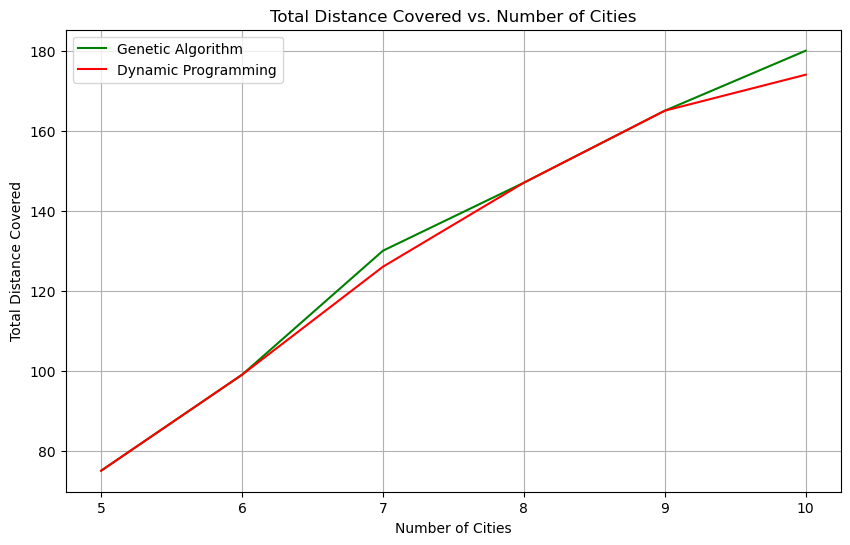

In [28]:
import matplotlib.pyplot as plt

noc = [5,6,7,8,9,10]

plt.figure(figsize=(10, 6))
plt.plot(noc, gen, 'g', label='Genetic Algorithm')
plt.plot(noc, dyn, 'r', label='Dynamic Programming')

plt.title('Total Distance Covered vs. Number of Cities')
plt.xlabel('Number of Cities')
plt.ylabel('Total Distance Covered')
plt.legend()
plt.grid(True)

plt.show()


## We can observe that the outputs of odd number of cities is more accurate than the even ones.
## In the TSP, when the number of cities is even, it's possible to create a tour with an equal number of cities on each side of the tour, resulting in two sub-tours. 
## This can lead to local optima where one sub-tour is optimal but combining them is suboptimal. 
## GAs, which explore a wide solution space, may be more likely to get stuck in such local optima.